<a href="https://colab.research.google.com/github/yuva1111/Medical_insurance/blob/main/medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('insurance.csv')

In [5]:
data.shape

(1338, 7)

In [6]:
columns=data.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

It is clearly seen that our dataset doesnot contain null values

In [9]:
types=dict(data.dtypes)
types

{'age': dtype('int64'),
 'bmi': dtype('float64'),
 'charges': dtype('float64'),
 'children': dtype('int64'),
 'region': dtype('O'),
 'sex': dtype('O'),
 'smoker': dtype('O')}

Dataset has 4 Numerical variables and 3 categorical variables

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Now let explore each categorical variable

In [12]:
categories=[]
for col in columns:
  if types[col]=='object':
    categories.append(col)
categories    

['sex', 'smoker', 'region']

In [13]:
for col in categories:
  print(col,":")
  print(data[col].unique())
  print(data.groupby(col).bmi.count())
  print("=================================")

sex :
['female' 'male']
sex
female    662
male      676
Name: bmi, dtype: int64
smoker :
['yes' 'no']
smoker
no     1064
yes     274
Name: bmi, dtype: int64
region :
['southwest' 'southeast' 'northwest' 'northeast']
region
northeast    324
northwest    325
southeast    364
southwest    325
Name: bmi, dtype: int64


###Feature Engineering and Data Visualization

Text(0, 0.5, 'Frequency')

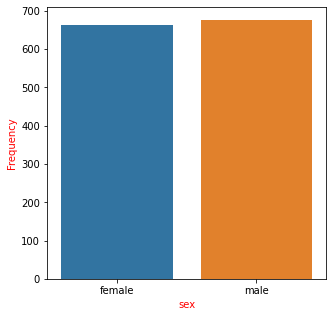

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="sex")
plt.xlabel("sex",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")

Text(0, 0.5, 'Frequency')

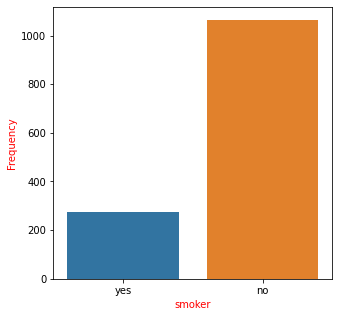

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="smoker")
plt.xlabel("smoker",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")

Text(0, 0.5, 'Frequency')

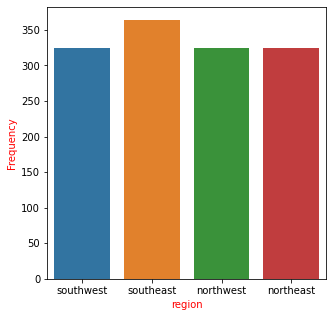

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="region")
plt.xlabel("region",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")

Text(0, 0.5, 'charges')

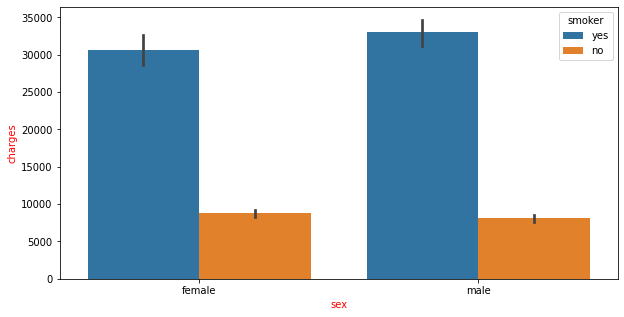

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='charges',x='sex',hue='smoker')
plt.xlabel("sex",size=10,c="r")
plt.ylabel("charges",size=10,c="r")

Text(0, 0.5, 'charges')

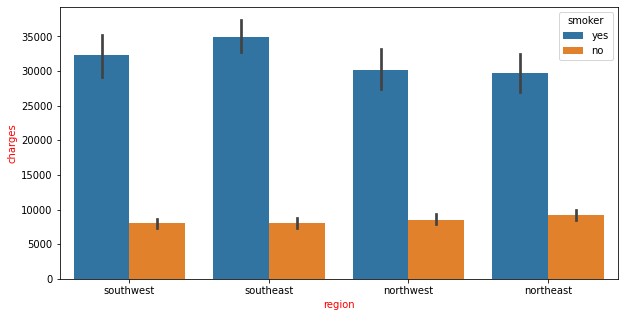

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='charges',x='region',hue='smoker')
plt.xlabel("region",size=10,c="r")
plt.ylabel("charges",size=10,c="r")

Text(0, 0.5, 'charges')

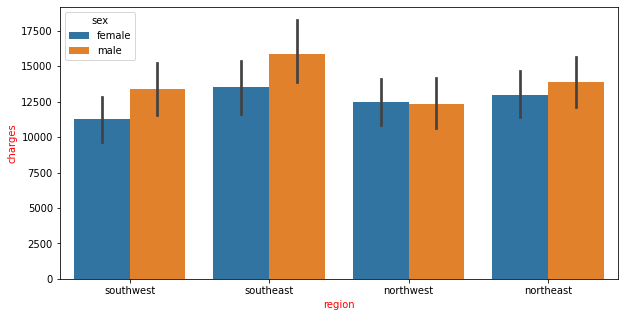

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='charges',x='region',hue='sex')
plt.xlabel("region",size=10,c="r")
plt.ylabel("charges",size=10,c="r")

###outlier checking  using box plots

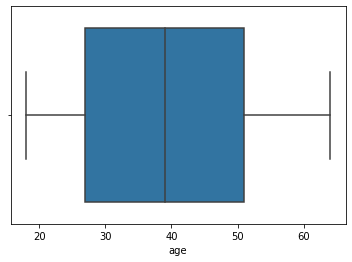

In [20]:
sns.boxplot(x='age',data=data)

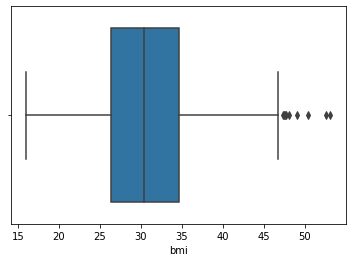

In [21]:
sns.boxplot(x='bmi',data=data)

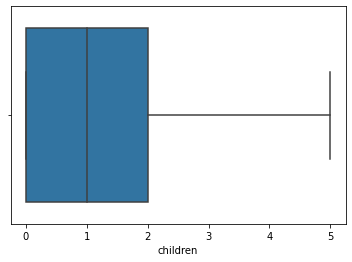

In [22]:
sns.boxplot(x='children',data=data)

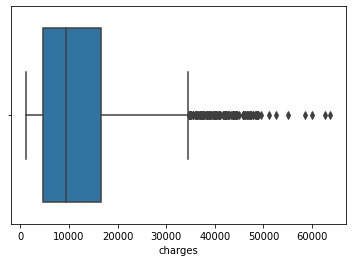

In [23]:
sns.boxplot(x='charges',data=data)

#####checking for the target distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


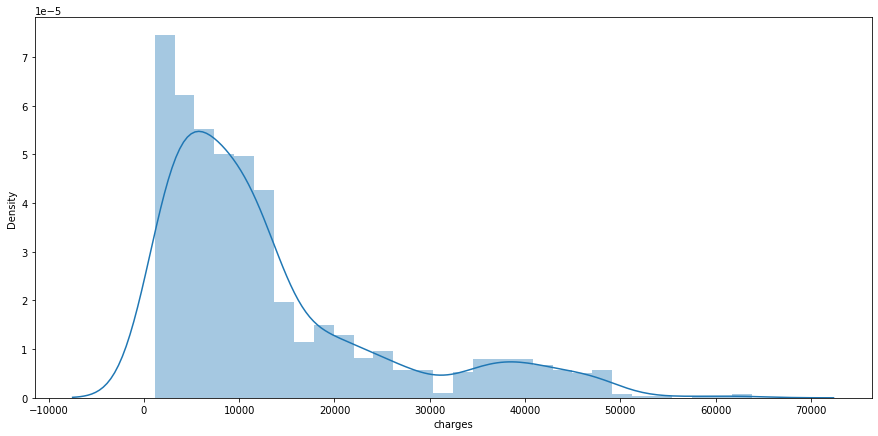

In [24]:
plt.figure(figsize=(15,7))
sns.distplot(data['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


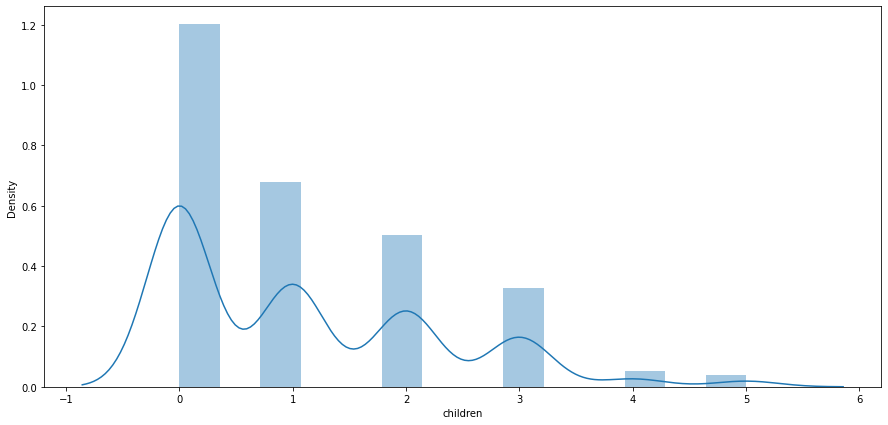

In [25]:
plt.figure(figsize=(15,7))
sns.distplot(data['children'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


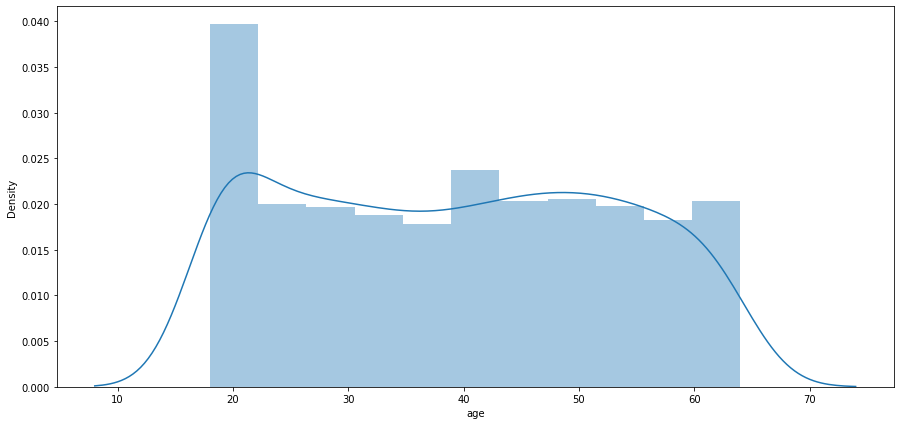

In [26]:
plt.figure(figsize=(15,7))
sns.distplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


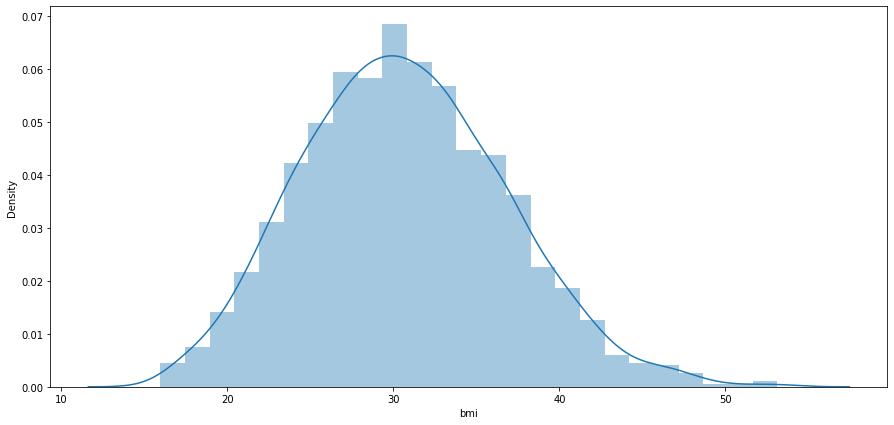

In [27]:
plt.figure(figsize=(15,7))
sns.distplot(data['bmi'])

We can see that data has some skewness we use skewness removal techniques

In [28]:
data['char_sqrt']=np.sqrt(data['charges'])

In [29]:
data

,age,sex,bmi,children,smoker,region,charges,char_sqrt
0,19,female,27.900,0,yes,southwest,16884.92400,129.942002
1,18,male,33.770,1,no,southeast,1725.55230,41.539768
2,28,male,33.000,3,no,southeast,4449.46200,66.704288
3,33,male,22.705,0,no,northwest,21984.47061,148.271611
4,32,male,28.880,0,no,northwest,3866.85520,62.184043
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,102.958964
1334,18,female,31.920,0,no,northeast,2205.98080,46.967870
1335,18,female,36.850,0,no,southeast,1629.83350,40.371196
1336,21,female,25.800,0,no,southwest,2007.94500,44.810099


In [30]:
data['char_sqrt'].skew()

0.7958625166976426

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


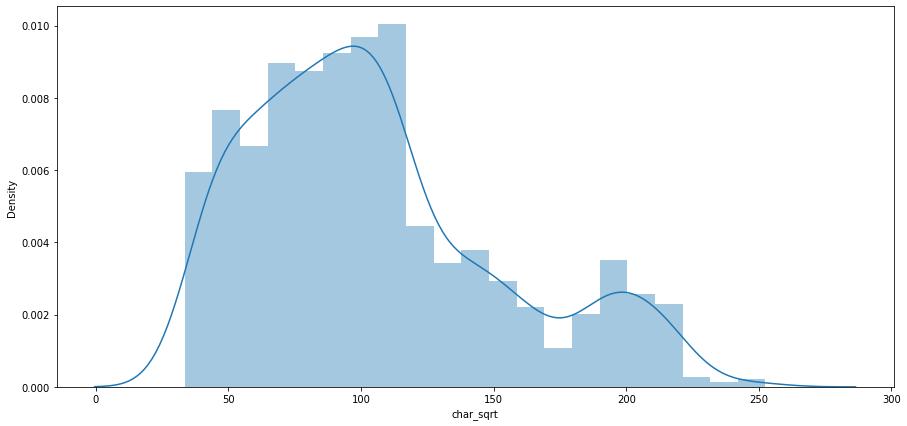

In [31]:
plt.figure(figsize=(15,7))
sns.distplot(data['char_sqrt'])

skew has still positive value.Square root was not completely removed the skewness

How we will use the Log Transformation

In [32]:
data['char_log']=np.log(data['charges'])

In [33]:
data['char_log'].skew()

-0.09009752473024582

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


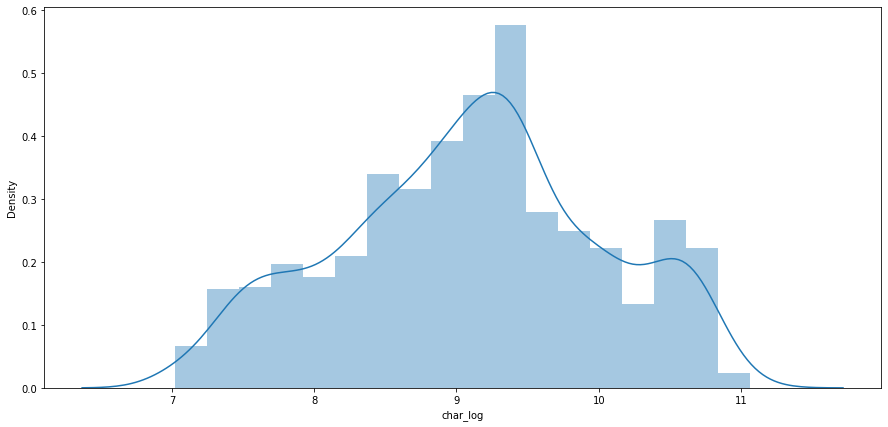

In [34]:
plt.figure(figsize=(15,7))
sns.distplot(data['char_log'])

As we can see log Transformation almost reduced all the skewness

Now we will check Box Transformation

In [35]:
from scipy import stats
char_box=stats.boxcox(data['charges'])[0]
pd.Series(char_box).skew()

-0.008734097133920383

In [36]:
char_box=pd.Series(char_box)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


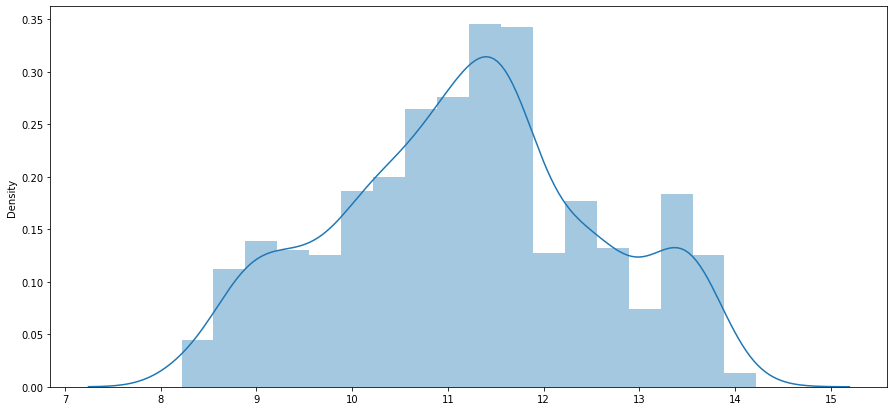

In [37]:
plt.figure(figsize=(15,7))
sns.distplot(char_box)

As we can see the box plot reduced most of the skewness

In [38]:
data['char_box']=char_box

In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges,char_sqrt,char_log,char_box
0,19,female,27.900,0,yes,southwest,16884.92400,129.942002,9.734176,12.128980
1,18,male,33.770,1,no,southeast,1725.55230,41.539768,7.453302,8.808596
2,28,male,33.000,3,no,southeast,4449.46200,66.704288,8.400538,10.147521
3,33,male,22.705,0,no,northwest,21984.47061,148.271611,9.998092,12.534950
4,32,male,28.880,0,no,northwest,3866.85520,62.184043,8.260197,9.945637


###now checking coorelation between the matrices

In [40]:
corr_dataframe=pd.DataFrame(data,columns=['age','char_box','bmi','children'])
corr_dataframe

,age,char_box,bmi,children
0,19,12.128980,27.900,0
1,18,8.808596,33.770,1
2,28,10.147521,33.000,3
3,33,12.534950,22.705,0
4,32,9.945637,28.880,0
...,...,...,...,...
1333,50,11.424196,30.970,3
1334,18,9.150491,31.920,0
1335,18,8.729683,36.850,0
1336,21,9.019131,25.800,0


In [41]:
matrix=corr_dataframe.corr()
matrix

,age,char_box,bmi,children
age,1.000000,0.518644,0.109272,0.042469
char_box,0.518644,1.000000,0.135792,0.156310
bmi,0.109272,0.135792,1.000000,0.012759
children,0.042469,0.156310,0.012759,1.000000


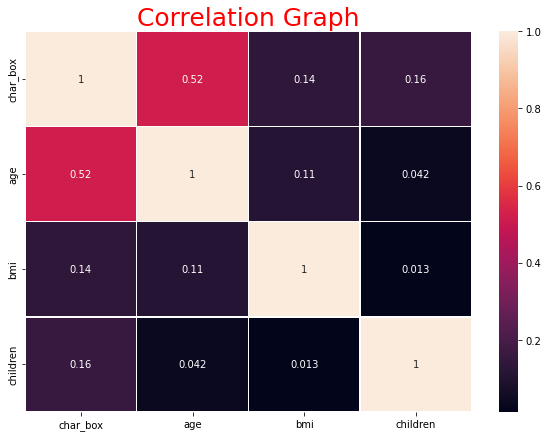

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(data[["char_box","age","bmi","children"]].corr(),annot=True, linewidths=.5)
plt.title("Correlation Graph",c="r",size=25)
plt.show()

###Scaling

In [43]:
temp=data
data=data.drop(columns=['sex','smoker','region'],axis=1)
cols=data.columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
pd_df=scaler.fit_transform(data.to_numpy())
data=pd.DataFrame(pd_df,columns=cols)
data

,age,bmi,children,charges,char_sqrt,char_log,char_box
0,-1.438764,-0.453320,-0.908614,0.298584,0.525799,0.691394,0.681644
1,-1.509965,0.509621,-0.078767,-0.953689,-1.325445,-1.790020,-1.748873
2,-0.797954,0.383307,1.580926,-0.728675,-0.798472,-0.759500,-0.768781
3,-0.441948,-1.305531,-0.908614,0.719843,0.909642,0.978513,0.978814
4,-0.513149,-0.292556,-0.908614,-0.776802,-0.893131,-0.912181,-0.916560
...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,-0.039257,0.184949,0.165744
1334,-1.509965,0.206139,-0.908614,-0.914002,-1.211775,-1.522799,-1.498607
1335,-1.509965,1.014878,-0.908614,-0.961596,-1.349917,-1.852106,-1.806638
1336,-1.296362,-0.797813,-0.908614,-0.930362,-1.256961,-1.625129,-1.594762


In [44]:
data['sex']=temp['sex']
data['region']=temp['region']
data['smoker']=temp['smoker']
data

,age,bmi,children,charges,char_sqrt,char_log,char_box,sex,region,smoker
0,-1.438764,-0.453320,-0.908614,0.298584,0.525799,0.691394,0.681644,female,southwest,yes
1,-1.509965,0.509621,-0.078767,-0.953689,-1.325445,-1.790020,-1.748873,male,southeast,no
2,-0.797954,0.383307,1.580926,-0.728675,-0.798472,-0.759500,-0.768781,male,southeast,no
3,-0.441948,-1.305531,-0.908614,0.719843,0.909642,0.978513,0.978814,male,northwest,no
4,-0.513149,-0.292556,-0.908614,-0.776802,-0.893131,-0.912181,-0.916560,male,northwest,no
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,-0.039257,0.184949,0.165744,male,northwest,no
1334,-1.509965,0.206139,-0.908614,-0.914002,-1.211775,-1.522799,-1.498607,female,northeast,no
1335,-1.509965,1.014878,-0.908614,-0.961596,-1.349917,-1.852106,-1.806638,female,southeast,no
1336,-1.296362,-0.797813,-0.908614,-0.930362,-1.256961,-1.625129,-1.594762,female,southwest,no


Now we have to encode the categorical variables

In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['sex']=labelencoder.fit_transform(data['sex'])
data['smoker']=labelencoder.fit_transform(data['smoker'])
data['region']=labelencoder.fit_transform(data['region'])
data

,age,bmi,children,charges,char_sqrt,char_log,char_box,sex,region,smoker
0,-1.438764,-0.453320,-0.908614,0.298584,0.525799,0.691394,0.681644,0,3,1
1,-1.509965,0.509621,-0.078767,-0.953689,-1.325445,-1.790020,-1.748873,1,2,0
2,-0.797954,0.383307,1.580926,-0.728675,-0.798472,-0.759500,-0.768781,1,2,0
3,-0.441948,-1.305531,-0.908614,0.719843,0.909642,0.978513,0.978814,1,1,0
4,-0.513149,-0.292556,-0.908614,-0.776802,-0.893131,-0.912181,-0.916560,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,-0.039257,0.184949,0.165744,1,1,0
1334,-1.509965,0.206139,-0.908614,-0.914002,-1.211775,-1.522799,-1.498607,0,0,0
1335,-1.509965,1.014878,-0.908614,-0.961596,-1.349917,-1.852106,-1.806638,0,2,0
1336,-1.296362,-0.797813,-0.908614,-0.930362,-1.256961,-1.625129,-1.594762,0,3,0


In [46]:
temp=data
data=data.drop(['charges','char_sqrt','char_log','char_box'],axis=1)
data

,age,bmi,children,sex,region,smoker
0,-1.438764,-0.453320,-0.908614,0,3,1
1,-1.509965,0.509621,-0.078767,1,2,0
2,-0.797954,0.383307,1.580926,1,2,0
3,-0.441948,-1.305531,-0.908614,1,1,0
4,-0.513149,-0.292556,-0.908614,1,1,0
...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,1,1,0
1334,-1.509965,0.206139,-0.908614,0,0,0
1335,-1.509965,1.014878,-0.908614,0,2,0
1336,-1.296362,-0.797813,-0.908614,0,3,0


In [47]:
data['charges']=temp['char_box']
data

,age,bmi,children,sex,region,smoker,charges
0,-1.438764,-0.453320,-0.908614,0,3,1,0.681644
1,-1.509965,0.509621,-0.078767,1,2,0,-1.748873
2,-0.797954,0.383307,1.580926,1,2,0,-0.768781
3,-0.441948,-1.305531,-0.908614,1,1,0,0.978814
4,-0.513149,-0.292556,-0.908614,1,1,0,-0.916560
...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,1,1,0,0.165744
1334,-1.509965,0.206139,-0.908614,0,0,0,-1.498607
1335,-1.509965,1.014878,-0.908614,0,2,0,-1.806638
1336,-1.296362,-0.797813,-0.908614,0,3,0,-1.594762


####Now lets Split the data into train and test

In [48]:
y=data['charges']
y

0       0.681644
1      -1.748873
2      -0.768781
3       0.978814
4      -0.916560
          ...   
1333    0.165744
1334   -1.498607
1335   -1.806638
1336   -1.594762
1337    1.299950
Name: charges, Length: 1338, dtype: float64

In [49]:
X=data.iloc[:,:-1]
X

,age,bmi,children,sex,region,smoker
0,-1.438764,-0.453320,-0.908614,0,3,1
1,-1.509965,0.509621,-0.078767,1,2,0
2,-0.797954,0.383307,1.580926,1,2,0
3,-0.441948,-1.305531,-0.908614,1,1,0
4,-0.513149,-0.292556,-0.908614,1,1,0
...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,1,1,0
1334,-1.509965,0.206139,-0.908614,0,0,0
1335,-1.509965,1.014878,-0.908614,0,2,0
1336,-1.296362,-0.797813,-0.908614,0,3,0


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [51]:
X_train.shape

(936, 6)

In [52]:
y_train.shape

(936,)

In [53]:
X_test.shape

(402, 6)

In [54]:
y_test.shape

(402,)

####model building

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
y_train_pred=linear_regressor.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("===============TRAIN DATA=====================")
print("score:",score)
print("error:",error)
print("==============================================")

===============TRAIN DATA=====================
score: 0.7552497001244618
error: 0.2421450653460337


In [57]:
y_test_pred=linear_regressor.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("=================TEST DATA====================")
print("score:",score)
print("error:",error)
print("==============================================")

=================TEST DATA====================
score: 0.8012772801566612
error: 0.20364696987313508


###Decision Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtree_regressor=DecisionTreeRegressor()
dtree_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [59]:
y_train_pred=dtree_regressor.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("=================TRAIN DATA===================")
print("score:",score)
print("error:",error)
print("==============================================")

=================TRAIN DATA===================
score: 0.9939436674366582
error: 0.005991866179749222


In [60]:
y_test_pred=dtree_regressor.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("===================TEST DATA=================")
print("score:",score)
print("error:",error)
print("=============================================")

===================TEST DATA=================
score: 0.6647037946382068
error: 0.343604678346387


###Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
rtree_regressor=RandomForestRegressor()
rtree_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [62]:
y_train_pred=rtree_regressor.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("==================TRAIN DATA==================")
print("score:",score)
print("error:",error)
print("==============================================")

==================TRAIN DATA==================
score: 0.9666768672984609
error: 0.032968425982121505


In [63]:
y_test_pred=rtree_regressor.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("=================TEST DATA===================")
print("score:",score)
print("error:",error)
print("=============================================")

=================TEST DATA===================
score: 0.8611187947285304
error: 0.14232261237245591


In [64]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [65]:
y_train_pred=svr.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("==================TRAIN DATA==================")
print("score:",score)
print("error:",error)
print("==============================================")

==================TRAIN DATA==================
score: 0.8137059093590495
error: 0.18431109083328012


In [66]:
y_test_pred=svr.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("=================TEST DATA===================")
print("score:",score)
print("error:",error)
print("====================================")

=================TEST DATA===================
score: 0.8830667389928509
error: 0.11983080897978438


###XGBOOST

In [67]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

[17:04:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [68]:
y_train_pred=xgb.predict(X_train)
score=r2_score(y_train,y_train_pred)
error=mean_squared_error(y_train,y_train_pred)

print("===================TRAIN DATA=================")
print("score:",score)
print("error:",error)
print("====================================")

===================TRAIN DATA=================
score: 0.8721741610883846
error: 0.12646520201162065


In [69]:
y_test_pred=svr.predict(X_test)
score=r2_score(y_test,y_test_pred)
error=mean_squared_error(y_test,y_test_pred)

print("====================TEST DATA================")
print("score:",score)
print("error:",error)
print("=============================================")

====================TEST DATA================
score: 0.8830667389928509
error: 0.11983080897978438


####Observations
As we that Decision Tree and Random Forest Regressor are overfitting the dataset

SVR and XGBoost Regressor performs well on the data.
Lets Do Hyper Parameter Tuning on SVR and XGBoost

###Parameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV
tuning_parameters=[
            {"kernel":['rbf','linear','poly'],"gamma":['scale','auto'],"C":[1,10,50,100]}
            
]
grid_regressor=GridSearchCV(svr,tuning_parameters)
grid_regressor.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [1, 10, 50, 100], 'gamma': ['scale', 'auto'],
                          'kernel': ['rbf', 'linear', 'poly']}])

In [71]:
grid_regressor.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [72]:
grid_regressor.best_estimator_

SVR(C=10)

In [73]:
grid_y_pred=grid_regressor.predict(X_test)

In [74]:
grid_regressor.score(X_test,y_test)

0.8835412513366313

Hyper parameter tuning on random forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
tuning_parameters=[
          {"n_estimators":[1,10,20,50,100],
            
           }
]
random_regressor=RandomForestRegressor()
grid_random_regressor=GridSearchCV(random_regressor,param_grid=tuning_parameters)

In [79]:
grid_random_regressor.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [1, 10, 20, 50, 100]}])

In [81]:
grid_random_regressor.best_params_

{'n_estimators': 20}

In [82]:
grid_random_y_pred=grid_random_regressor.predict(X_test)

In [83]:
grid_random_regressor.score(X_test,y_test)

0.8580374654104872